# Random Sample Imputation (Categorical Features)

## Introduction

Categorical variables in real-world datasets often contain missing values due to incomplete data collection or system errors. Since categorical features represent discrete labels rather than numerical magnitudes, traditional statistical imputation techniques such as mean or median cannot be applied.

Random Sample Imputation is a technique where missing categorical values are replaced by randomly selecting existing (non-missing) category labels from the same feature.

This method preserves the original category distribution and prevents artificial dominance of the most frequent category.

---

### Import requirements 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Dataset 

In [3]:
df=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


### NUll values Percentage 

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [6]:
X=df
y=df['SalePrice']

### Data Spliting 

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.head()   

,FireplaceQu,GarageQual,SalePrice
254,NaN,TA,145000
1066,TA,TA,178000
638,NaN,NaN,85000
799,TA,TA,175000
380,Gd,TA,127000


In [12]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

In [13]:
X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [15]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
827,TA,TA,189000,TA,TA
992,Fa,TA,187000,TA,Fa
880,NaN,TA,157000,TA,NaN
793,NaN,TA,225000,TA,NaN
1458,NaN,TA,142125,TA,NaN


In [16]:
X_test.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
371,Gd,TA,134432,TA,Gd
575,NaN,TA,118500,TA,NaN
141,NaN,TA,260000,TA,NaN
365,NaN,TA,147000,TA,NaN
1156,Gd,TA,179900,TA,Gd


### Imputing The Sample Values 

In [17]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [18]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [19]:
X_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
696,NaN,TA,89000,TA,Gd
1381,Gd,TA,237500,TA,Gd
1315,Gd,TA,206900,TA,Gd
873,Gd,TA,133000,TA,Gd
265,TA,TA,175500,TA,TA
256,NaN,TA,207500,TA,Ex
19,NaN,TA,139000,TA,TA
596,NaN,TA,114504,TA,TA
100,TA,TA,205000,TA,TA
357,Po,TA,134000,TA,Po


In [20]:
X_train.isnull().sum()

FireplaceQu            547
GarageQual              64
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [22]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)
temp.columns = ['original', 'imputed']

In [23]:
temp.head()

,original,imputed
TA,0.951087,0.952911
Fa,0.032609,0.031678
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [24]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [25]:
temp.head()

,original,imputed
Gd,0.491143,0.495719
TA,0.405797,0.404110
Fa,0.043478,0.041952
Ex,0.033816,0.031678
Po,0.025765,0.026541


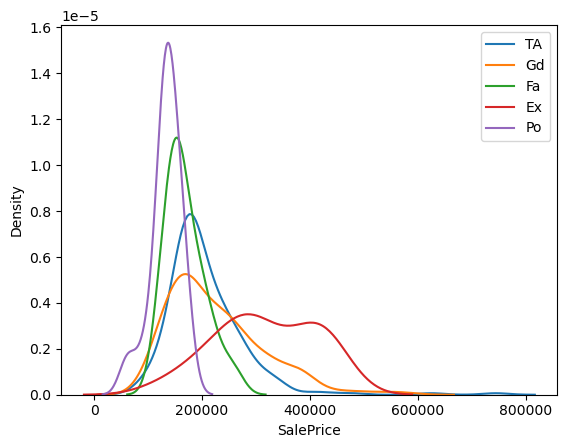

In [26]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

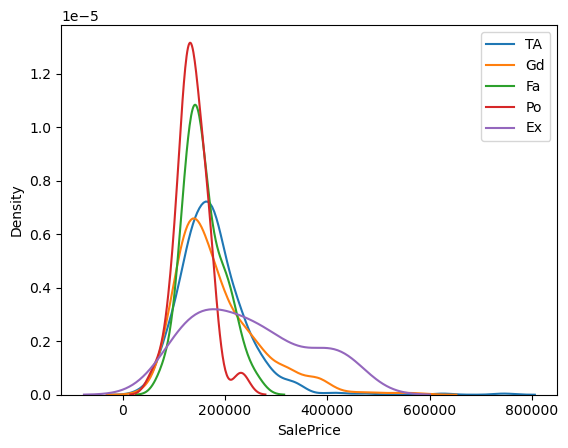

In [27]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show
plt.legend()